In [1]:
# 
import pandas as pd
allDat = pd.read_excel('/home/or/Documents/kpe_analyses/KPEIHR0009_data_all_scored.xlsx')
medDat = allDat[['scr_id','med_cond']]
medDat.at[17, 'med_cond'] = 1 # change subject 1464 medication to 1
medDat = medDat.append({'scr_id' : 'KPE1468' , 'med_cond' : 0}, ignore_index=True)
medDat = medDat.append({'scr_id' : 'KPE1480' , 'med_cond' : 0}, ignore_index=True)
medDat = medDat.append({'scr_id' : 'KPE1499' , 'med_cond' : 1}, ignore_index=True)

In [57]:
import pandas as pd
allDat = pd.read_csv('/home/or/Documents/kpe_analyses/KPEIHR0009_DATA_2019-10-07_1121.csv')
pclDat = allDat.filter(like='pcl5')
# remove two irrelevant vars
del pclDat['pcl5_complete']
del pclDat['pcl5_total']
# sum all pcl scores
a = pclDat.sum(axis = 1, skipna = True) 
# add a to df
pclDat.insert(20, "pcl_total", a)
pclDat.insert(0, "scr_id", allDat['scr_id'])
pclDat.insert(1, "redcap_event_name", allDat["redcap_event_name"])
newPclDat = pclDat[((pclDat['redcap_event_name'] == 'screening_selfrepo_arm_1') | 
                    (pclDat['redcap_event_name'] == 'visit_1_arm_1') | 
                    #(pclDat['redcap_event_name'] == 'visit_2_infusion_s_arm_1') | 
                    (pclDat['redcap_event_name'] == 'visit_7_week_follo_arm_1') | 
                    (pclDat['redcap_event_name'] == '30_day_follow_up_s_arm_1') | 
                    (pclDat['redcap_event_name'] == '90_day_follow_up_s_arm_1'))]


In [58]:
widePclDat = newPclDat.pivot(index='scr_id', columns='redcap_event_name', values='pcl_total')
widePclDat

redcap_event_name,30_day_follow_up_s_arm_1,90_day_follow_up_s_arm_1,screening_selfrepo_arm_1,visit_1_arm_1,visit_7_week_follo_arm_1
scr_id,,,,,
CB1554,NaN,NaN,51.0,NaN,NaN
CB1562,NaN,NaN,22.0,NaN,NaN
KPE 1560,NaN,NaN,77.0,NaN,NaN
KPE 1565,NaN,NaN,60.0,NaN,NaN
KPE006,NaN,NaN,36.0,NaN,NaN
KPE008,56.0,49.0,51.0,58.0,61.0
KPE1205,NaN,NaN,43.0,NaN,NaN
KPE1223,42.0,49.0,39.0,41.0,50.0
KPE1240,NaN,NaN,49.0,NaN,NaN


In [96]:
# remove all NAs in visit7
PclDat_nonNa = widePclDat.dropna(subset=['visit_7_week_follo_arm_1'])
# check if there is a 0 and change to NaN
#

PclDat_nonNa.at['KPE1351', 'visit_1_arm_1'] = 'NaN'
PclDat_nonNa.at['KPE1390', 'visit_1_arm_1'] = 'NaN'
PclDat_nonNa

redcap_event_name,30_day_follow_up_s_arm_1,90_day_follow_up_s_arm_1,screening_selfrepo_arm_1,visit_1_arm_1,visit_7_week_follo_arm_1
scr_id,,,,,
KPE008,56.0,49.0,51.0,58.0,61.0
KPE1223,42.0,49.0,39.0,41.0,50.0
KPE1253,33.0,NaN,58.0,63.0,58.0
KPE1263,37.0,34.0,21.0,54.0,56.0
KPE1293,8.0,3.0,33.0,36.0,6.0
KPE1307,45.0,20.0,56.0,49.0,41.0
KPE1315,NaN,NaN,40.0,38.0,8.0
KPE1322,38.0,27.0,45.0,56.0,22.0
KPE1339,46.0,67.0,68.0,0.0,65.0


In [97]:
# rename columns
# merging datasets to have medical conditions also
fullPCL = PclDat_nonNa.merge(medDat, left_on='scr_id', right_on='scr_id', how='outer')

# rename
fullPCL = fullPCL.rename(columns={"30_day_follow_up_s_arm_1": "30_days", "90_day_follow_up_s_arm_1": "90_days",
                   "screening_selfrepo_arm_1":"screening", 
                   "visit_1_arm_1" : "visit_1",
                   "visit_7_week_follo_arm_1" : "visit_7"
                  })

# reorder columns
colOrder = ['scr_id','med_cond','screening','visit_1','visit_7','30_days', '90_days']
fullPCL = fullPCL[colOrder]
fullPCL

,scr_id,med_cond,screening,visit_1,visit_7,30_days,90_days
0,KPE008,1.0,51.0,58.0,61.0,56.0,49.0
1,KPE1223,1.0,39.0,41.0,50.0,42.0,49.0
2,KPE1253,0.0,58.0,63.0,58.0,33.0,NaN
3,KPE1263,0.0,21.0,54.0,56.0,37.0,34.0
4,KPE1293,1.0,33.0,36.0,6.0,8.0,3.0
5,KPE1307,1.0,56.0,49.0,41.0,45.0,20.0
6,KPE1315,1.0,40.0,38.0,8.0,NaN,NaN
7,KPE1322,1.0,45.0,56.0,22.0,38.0,27.0
8,KPE1339,1.0,68.0,0.0,65.0,46.0,67.0
9,KPE1343,1.0,28.0,38.0,20.0,20.0,19.0


In [152]:
fullPCL_melt = pd.melt(fullPCL, id_vars=['scr_id','med_cond'], var_name = 'time', value_name='pcl')
# save as csv
fullPCL_melt.to_csv('fullPCL_melt.csv', index = False)
fullPCL.to_csv('fullPCL.csv', index = False)
fullPCL_melt

,scr_id,med_cond,time,pcl
0,KPE008,1.0,screening,51.0
1,KPE1223,1.0,screening,39.0
2,KPE1253,0.0,screening,58.0
3,KPE1263,0.0,screening,21.0
4,KPE1293,1.0,screening,33.0
5,KPE1307,1.0,screening,56.0
6,KPE1315,1.0,screening,40.0
7,KPE1322,1.0,screening,45.0
8,KPE1339,1.0,screening,68.0
9,KPE1343,1.0,screening,28.0


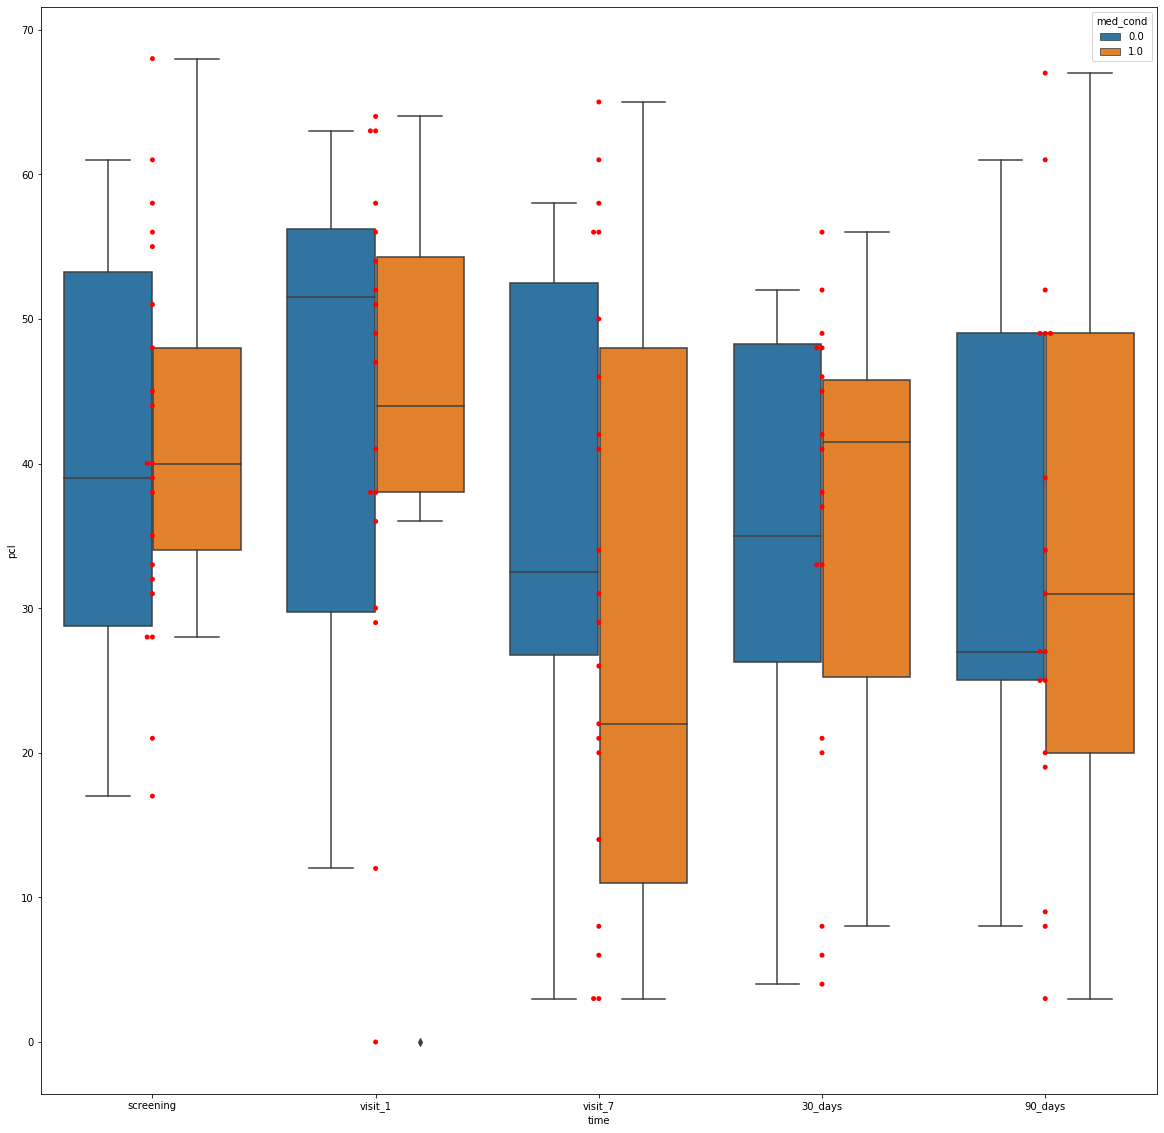

In [99]:
import seaborn as sb
from matplotlib.pyplot import figure
figure(figsize = (20,20))
ax = sb.boxplot(x="time", y="pcl", hue='med_cond', data=fullPCL_melt)
ax = sb.swarmplot(x='time', y='pcl', data=fullPCL_melt, color="red")


In [151]:
# ANOVA
import statsmodels.api as sm
model = sm.MixedLM.from_formula("pcl ~ time" , fullPCL_melt, groups=fullPCL_melt["time"], missing = 'drop')
result = model.fit()
print (result.summary())
model.group_list()

            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   pcl      
No. Observations:    96        Method:               REML     
No. Groups:          5         Scale:                299.7846 
Min. group size:     18        Likelihood:           -395.9929
Max. group size:     21        Converged:            Yes      
Mean group size:     19.2                                     
--------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------
Intercept          34.833   14.635  2.380 0.017   6.150 63.517
time[T.90_days]    -1.833   19.221 -0.095 0.924 -39.505 35.839
time[T.screening]   6.500   24.542  0.265 0.791 -41.601 54.601
time[T.visit_1]     8.556   15.300  0.559 0.576 -21.431 38.542
time[T.visit_7]    -1.881   24.971 -0.075 0.940 -50.824 47.062
Group Var         299.785                                     



/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


TypeError: group_list() missing 1 required positional argument: 'array'